In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
%matplotlib inline


In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print( "Type of boston dataset:", type(boston))

Type of boston dataset: <class 'sklearn.utils.Bunch'>


##1. <class 'sklearn.utils.Bunch'> means the data here is stored in the form of extended dictionary and the keys here are the attributes

In [ ]:
#we try to get the description of the boston dataset 
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# Let's change the data to a Pandas Dataframe
boston_df = pd.DataFrame(boston['data'] )
boston_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston_df.shape

(506, 13)

In [ ]:
#Now add the column names.
boston_df.columns = boston['feature_names']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
boston_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
X = load_boston().data
y = load_boston().target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(339, 13) (167, 13) (339,) (167,)


In [ ]:
#here the data is of different units i.e, each feature is having different values we need to standardize the data 
#question:why you are doing the standarization and why not normalization 
#standarization helps in having an extra mile of understanding the data so as to get some more insights 
#normalization will be helping in fixing the range of all the values of thew attributes

In [ ]:
# standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [ ]:
train_data=pd.DataFrame(X_train)
train_data['price']=y_train
train_data.head(3)

x_test=np.array(X_test)
y_test=np.array(y_test)

In [ ]:
#firstly we need to find the line equation of the line that will be passing through the maximum #points in the dataset
#we need to find the y^(y_hat value)
#line equation:y=mx=c
#y_prediction=m(slope)*X(datapoint)+c(y-intercept)
#y_prediction=np.dot(m,X(i))+c


In [ ]:
#with the give line equation we need to check if this is the best fit line from the SUM OF THE SQUARED ERRORS  of the dataset 
#we need to find the minimal value of the SQUARED ERROR with the optimal value of the slope(m) and y-intercept (c) belonging to the best fit line 


In [ ]:
#The optimal slope and y-intercept are achived by the partial derivative of the the loss function 
#loss function=argmin(m,c) Σ(y(i)-y^(i))^2
#In simple terms loss function=argmin(m,c) Σ (actual - predicted)^2

In [ ]:
#now lets take the gradient of the loss function w.r.t slope and the y-intercept

In [ ]:
#as given in the assignment video 
#m_grad=m_grad + (-2)*X[i]*(y[i]-(y_prediction))
#c_grad=b_grad + (-2)*(y[i]-(y_prediction))
#we need to remember that the we need to run the gradient of the slope and y-intercept for every value of X 

In [ ]:
#as this is a iterative process and we intialization of the slope and the y-intercept start with random values.
#to get the next closest slope and intercept value we will have a update function.
#this update function will decide the next slope and as well as for the y-intercept.
#new_intercept=old_intercept-learning_rate[c_grad]
#new_slope=old_slope-learning_rate[m_grad]
#here the learning_rate will decide how closer the next slope or intercept has to jump for their respective optimal values. 

In [ ]:
#to avoid the oscillation of the new_slope and new_intercept we need to decrease the learning_rate for every iteration
#there is no rule that we need to decrease the learning rate to a certain value
#here we'll divide the learning rate by 2

In [ ]:
#In SGD we will take k #points where 1<k<n
#from the old slope or intercept to reach the new slope or intercept, the update function will use different set of k 
#Here we consider k as batch_size

In [ ]:
#we need to control the #iterations for the update fnction to run 

In [ ]:
def sgd(train_data,learning_rate,iterations,k,decrease_lr):
    
    # Initially we will keep our W and B as 0 as per the Training Data
    m=np.zeros(shape=(1,train_data.shape[1]-1))
    c=0
    
    
    for iterations in range(1,iterations+1):

        # We will create a small training data set of size K
        temp=train_data.sample(k)
        
        # We create our X and Y from the above temp dataset
        y=np.array(temp['price'])
        x=np.array(temp.drop('price',axis=1))
        
        # We keep our initial gradients as 0
        m_grad=np.zeros(shape=(1,train_data.shape[1]-1))
        c_grad=0
        
        for i in range(k): # Calculating gradients for point in our K sized dataset
            prediction=np.dot(m,x[i])+c
            m_grad=m_grad+(-2)*x[i]*(y[i]-(prediction))
            c_grad=c_grad+(-2)*(y[i]-(prediction))
        
        #Updating the weights(W) and Bias(b) with the above calculated Gradients
        m=m-learning_rate*(m_grad/k)
        c=c-learning_rate*(c_grad/k)
        
        # Incrementing the iteration value
        iterations=iterations+1
        
        #Dividing the learning rate by the specified value
        learning_rate=learning_rate/decrease_lr
        
    return m,c #Returning the weights and Bias

In [ ]:
def predict(x,m,c):
    y_prediction=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(m,x[i])+c)
        y_prediction.append(y)
    return np.array(y_prediction)
    

In [ ]:
m,c=sgd(train_data,0.001,1000,10,1)
y_test_prediction=predict(X_test,m,c)

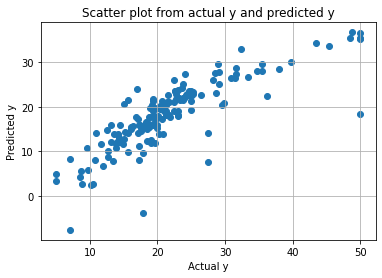

In [ ]:
plt.scatter(y_test,y_test_prediction)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error
mean_sqerror1 = mean_squared_error(y_test,y_test_prediction)
print("Mean squared error",mean_sqerror1)


Mean squared error 34.03632111454727


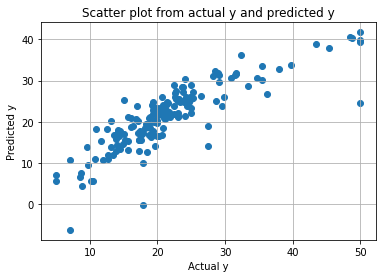

In [ ]:
#now we need to try the sklearn sgdRegressor
from sklearn.linear_model import SGDRegressor
SGD = SGDRegressor(loss='squared_loss', max_iter=500)
SGD.fit(X_train,y_train)
y_TEST_prediction = SGD.predict(X_test)
plt.scatter(y_test,y_TEST_prediction)
plt.grid()
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Scatter plot from actual y and predicted y')
plt.show()

In [ ]:
mean_sqerror2 = mean_squared_error(y_test,y_TEST_prediction)
print("Mean squared error",mean_sqerror2)

Mean squared error 21.084002437080102


In [ ]:
#here we have the best fit weights of the sgd regressor built from scratch
bestfit_weights=pd.DataFrame(m)
bestfit_weights=bestfit_weights.T
bestfit_weights.columns=['SGD_prototype']
print(bestfit_weights)

    SGD_prototype
0       -0.652678
1        0.334406
2       -0.234868
3        1.319235
4       -0.483704
5        3.145246
6       -0.311510
7       -1.162457
8        0.086690
9       -0.325474
10      -1.717234
11       0.967010
12      -3.127570


In [ ]:
#here we have the best weights of the sklearn's sgd regressor
bestfit_weights2=pd.DataFrame(SGD.coef_)
bestfit_weights2.columns=['SGD_sklearn']
print(bestfit_weights2)

    SGD_sklearn
0     -0.911090
1      0.716755
2      0.192700
3      0.891279
4     -1.722460
5      2.851760
6     -0.372715
7     -2.908668
8      1.412806
9     -0.699407
10    -2.039594
11     1.019959
12    -3.916118


In [ ]:
table=pd.concat([bestfit_weights,bestfit_weights2], axis=1, sort=False)

In [ ]:
print(table)

    SGD_prototype  SGD_sklearn
0       -0.652678    -0.911090
1        0.334406     0.716755
2       -0.234868     0.192700
3        1.319235     0.891279
4       -0.483704    -1.722460
5        3.145246     2.851760
6       -0.311510    -0.372715
7       -1.162457    -2.908668
8        0.086690     1.412806
9       -0.325474    -0.699407
10      -1.717234    -2.039594
11       0.967010     1.019959
12      -3.127570    -3.916118


In [ ]:
print("mean square error of the sgd_prototype",mean_sqerror1)
print("mean square error of the sgd_sklearn",mean_sqerror2)

mean square error of the sgd_prototype 34.03632111454727
mean square error of the sgd_sklearn 21.084002437080102
